In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d

In [7]:
def read_train_data (train_file_path):
    # Load data and convert to pd
    train = pd.read_csv(train_file_path)
    return train

In [9]:
train_data = read_train_data("data/Training.csv")


In [10]:
def read_test_data (test_file_path):
    # Load data and convert to pd
    test = pd.read_csv(test_file_path)
    return test

In [13]:
test_data = read_test_data("data/Testing.csv")


In [14]:
def analyze_dataset():
    
    # Display the info of the training dataset
    print("Training dataset info:")
    print(train_data.info())
    
    # Check for null values
    null_values = train_data.isnull()
    print("Null values in the dataset:")
    print(null_values)
    
    # Drop columns with null values and print the cleaned dataset
    train_cleaned_columns = train_data.dropna(axis=1)
    print("\nColumns after dropping those with null values:")
    print(train_cleaned_columns.columns)
    
    # Check again for null values in the cleaned dataset
    null_values_cleaned = train_cleaned_columns.isnull()
    print("Null values in the cleaned dataset:")
    print(null_values_cleaned)
    
    # Get unique prognosis values
    unique_prognosis = train_cleaned_columns["prognosis"].unique()
    print("\nUnique prognosis values:")
    print(unique_prognosis)
    
    # Percentage distribution of each prognosis
    prognosis_percentage = 100 * train_cleaned_columns.groupby("prognosis").size() / train_cleaned_columns.shape[0]
    print("\nPercentage of each prognosis:")
    print(prognosis_percentage)
    
    # Value counts of each prognosis (absolute and normalized)
    prognosis_value_counts = train_cleaned_columns["prognosis"].value_counts()
    print("\nValue counts of prognosis:")
    print(prognosis_value_counts)
    
    prognosis_value_counts_normalized = train_cleaned_columns["prognosis"].value_counts(normalize=True)
    print("\nNormalized value counts of prognosis (in percentages):")
    print(prognosis_value_counts_normalized)

In [15]:
analyze_dataset()

Training dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB
None
Null values in the dataset:
      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0       False      False                 False                False   
1       False      False                 False                False   
2       False      False                 False                False   
3       False      False                 False                False   
4       False      False                 False                False   
...       ...        ...                   ...                  ...   
4915    False      False                 False                False   
4916    False      False                 False                False   
4917    False      False                 False                False   
4918    False      False                 False    

In [5]:
value_columns = train_data.columns.difference(['prognosis', 'Unnamed: 133']).tolist()

# repeat this process for every disease basically


melted_train_data = train_data.melt(id_vars=['prognosis'], value_vars=value_columns).groupby(['prognosis', 'variable']).sum('value')

melted_train_data = melted_train_data[melted_train_data['value'] > 0]


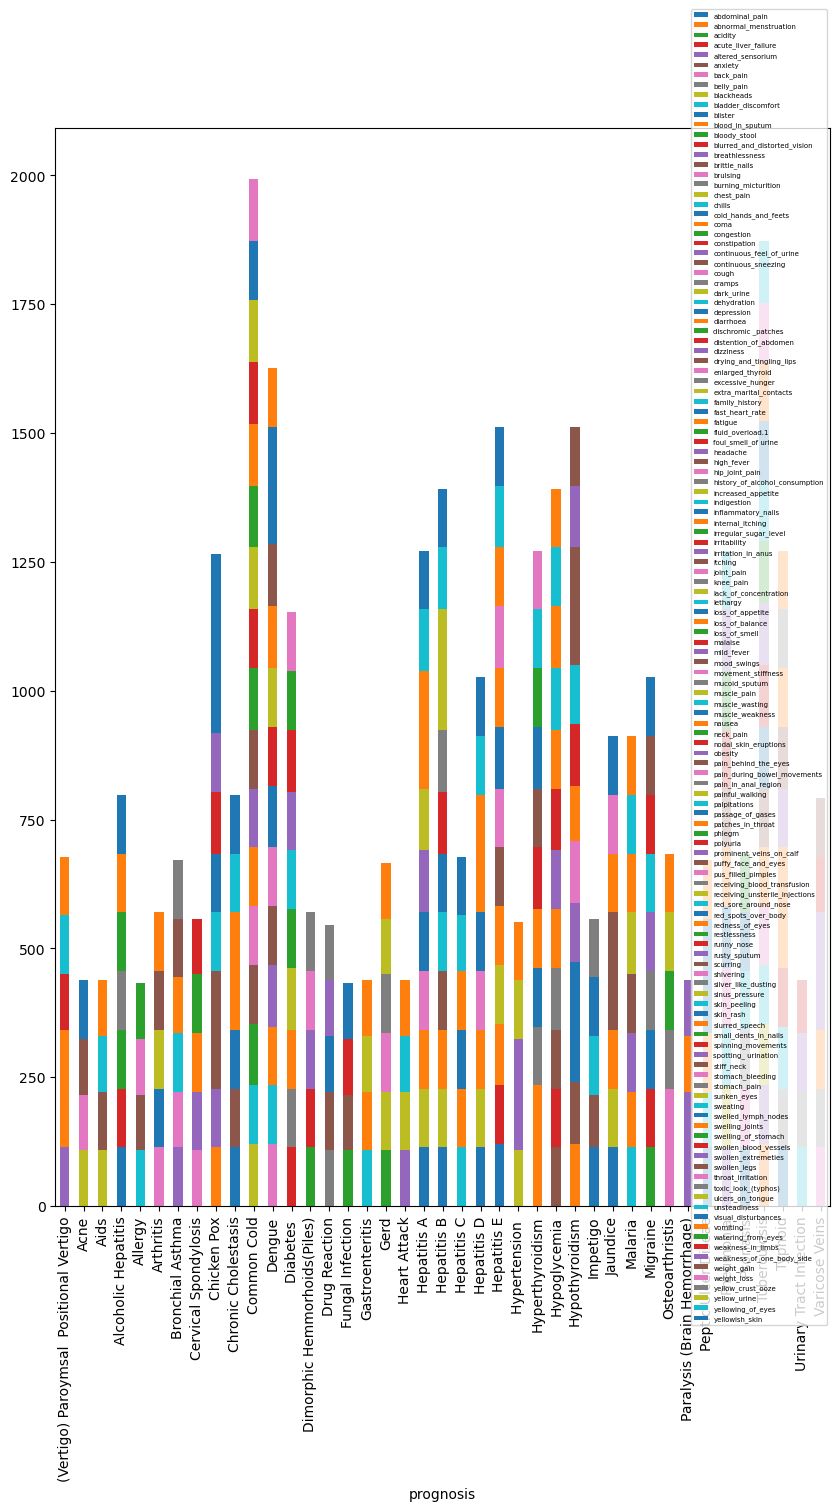

In [6]:
melted_train_data = train_data.melt(id_vars=['prognosis'], value_vars=value_columns)

melted_train_data = melted_train_data[melted_train_data['value'] > 0]
ax = melted_train_data.groupby(['prognosis', 'variable'])['value'].sum().unstack().plot(kind='bar', stacked=True, figsize=[10,14])
ax.legend(loc='right', fontsize=5)


                       itching  skin_rash  nodal_skin_eruptions  \
itching               1.000000   0.318158              0.326439   
skin_rash             0.318158   1.000000              0.298143   
nodal_skin_eruptions  0.326439   0.298143              1.000000   
continuous_sneezing  -0.086906  -0.094786             -0.032566   
shivering            -0.059893  -0.065324             -0.022444   
...                        ...        ...                   ...   
inflammatory_nails   -0.061573   0.331087             -0.023073   
blister              -0.061573   0.331087             -0.023073   
red_sore_around_nose -0.061573   0.331087             -0.023073   
yellow_crust_ooze    -0.061573   0.331087             -0.023073   
Unnamed: 133               NaN        NaN                   NaN   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.086906  -0.059893 -0.175905   -0.160650   
skin_rash                       -0.0947

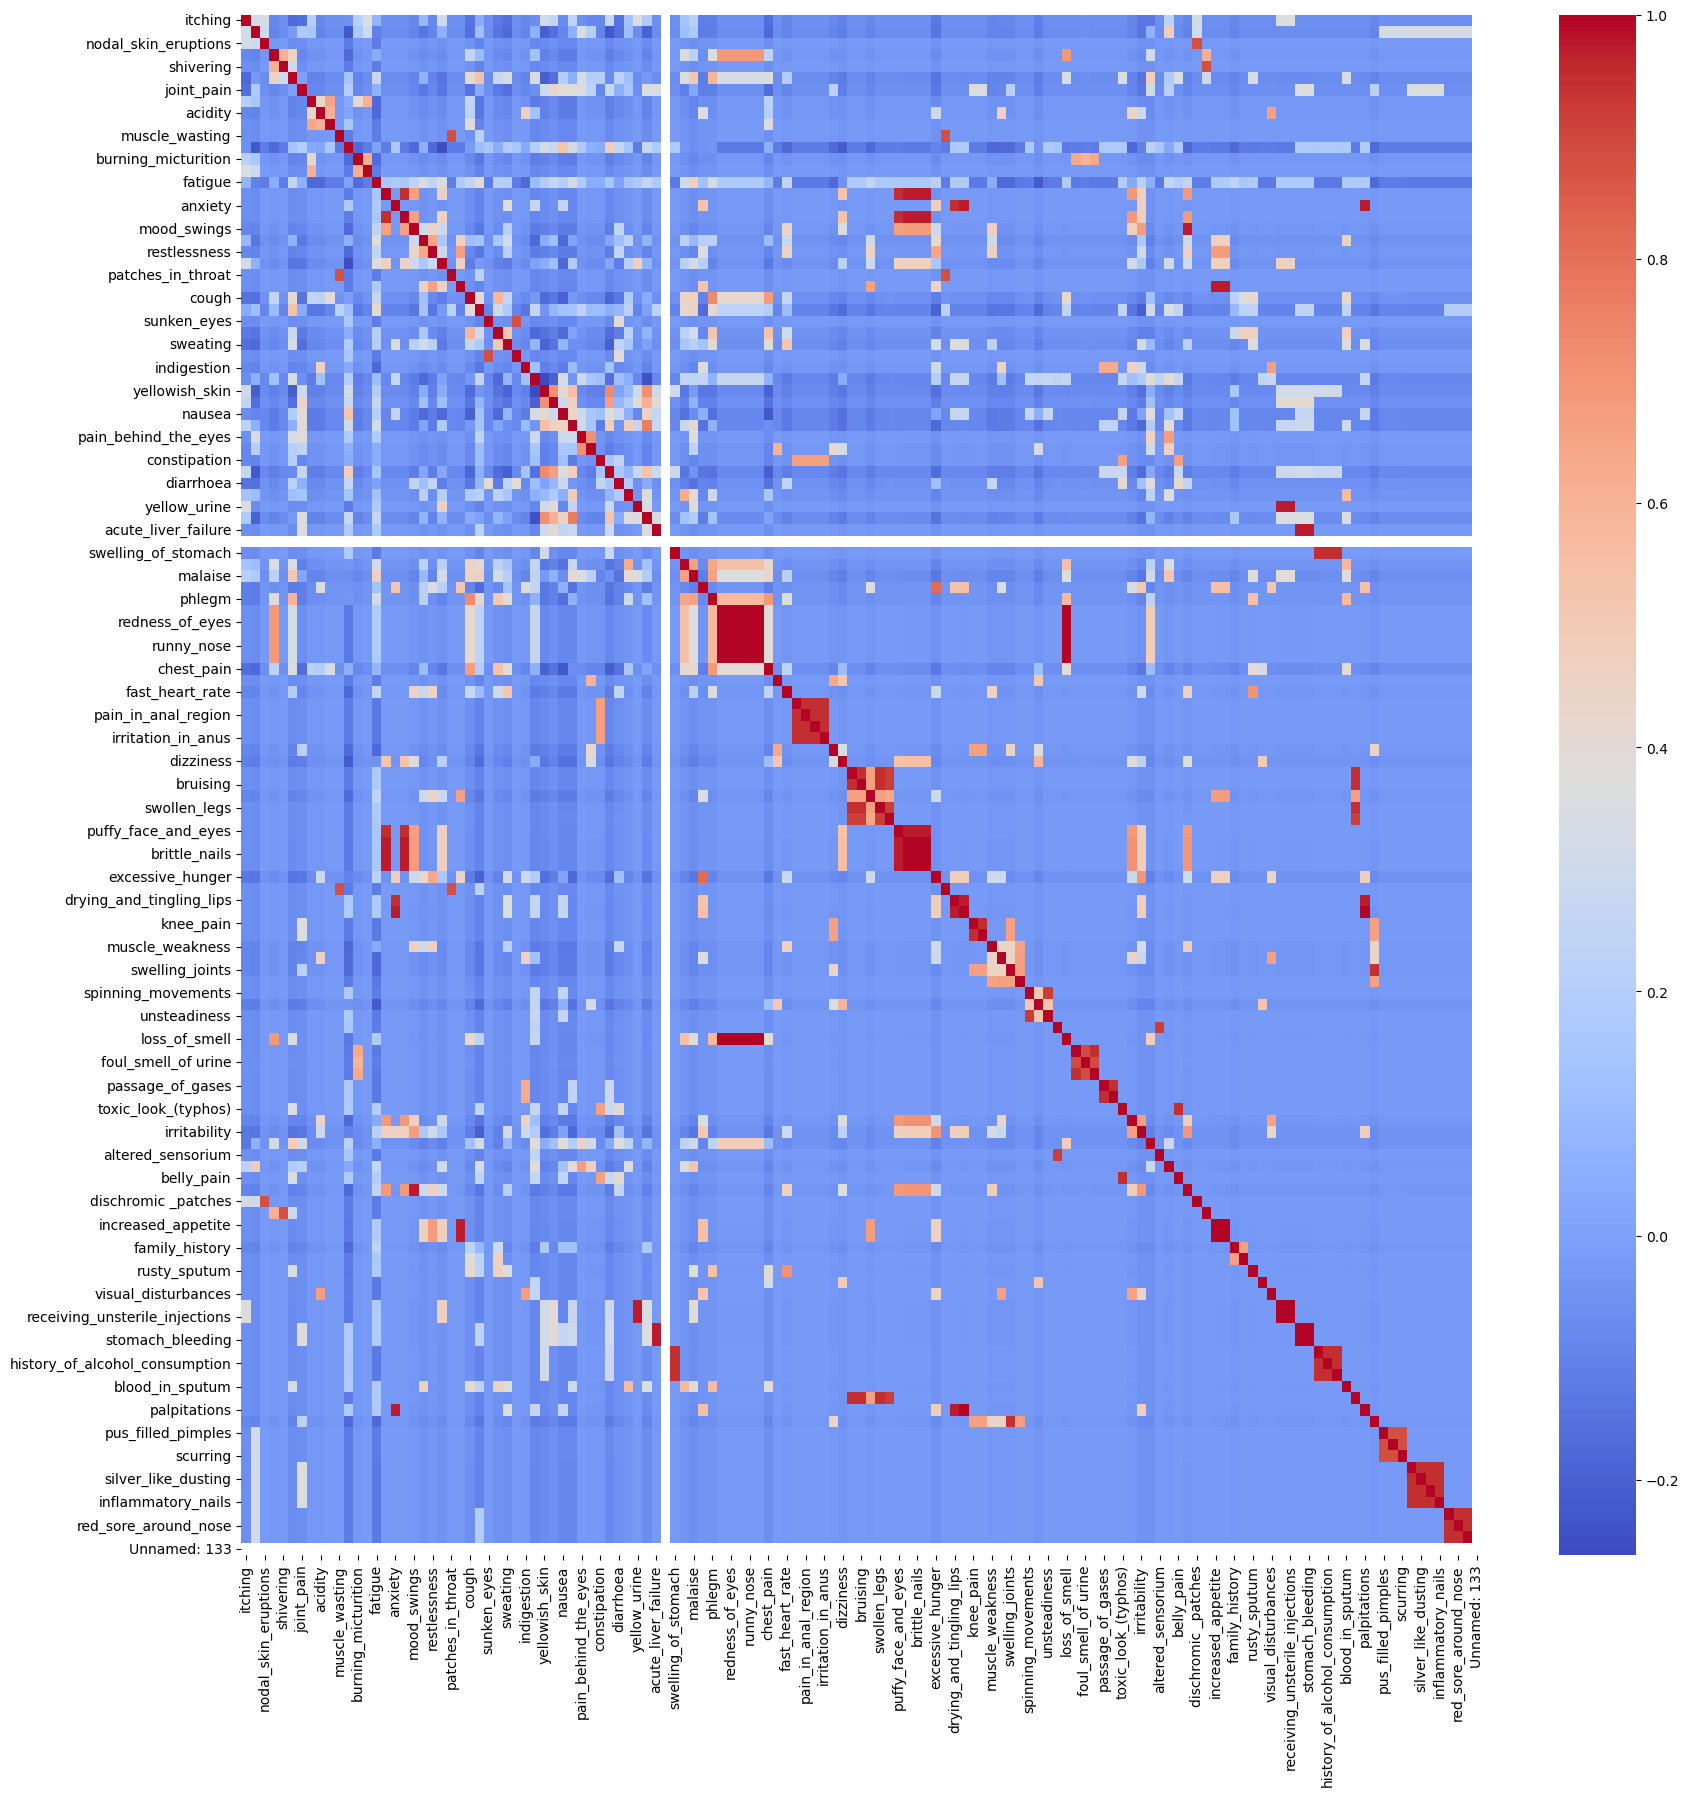

In [7]:
# Next the concept is to create a correlation matrix between the variables 
print(train_data.corr(numeric_only=True))
plt.figure(figsize=(20,20))
sns.set_context(rc={"figure.figsize": (20,20)})
heat_plot = sns.heatmap(train_data.corr(numeric_only=True), annot=False, cmap=sns.color_palette("coolwarm", as_cmap=True))

plt.show()

In [16]:
def process_melted_data():
    # Get all columns except 'prognosis' and 'Unnamed: 133'
    value_columns = train_data.columns.difference(['prognosis', 'Unnamed: 133']).tolist()
    
    # Melt the dataset based on the 'prognosis' column and value_columns
    melted_train_data = train_data.melt(id_vars=['prognosis'], value_vars=value_columns)
    
    # Group by 'prognosis' and 'variable', and sum the 'value'
    melted_train_data = melted_train_data.groupby(['prognosis', 'variable']).sum('value')
    
    # Filter the data to keep only rows where 'value' > 0
    melted_train_data = melted_train_data[melted_train_data['value'] > 0]
    
    # Return the processed data
    return melted_train_data

In [19]:
def plot_disease_bar_plots():
    # Process the data using the process_melted_data function
    melted_train_data = process_melted_data()
    
     # Check if melted_train_data has data
    if melted_train_data.empty:
        print("The melted data is empty. Check if the processing function is correct.")
        return

    # Get unique diseases from the melted_train_data index
    unique_diseases = melted_train_data.index.get_level_values('prognosis').unique()

    # Define the number of subplots based on the number of diseases
    num_diseases = len(unique_diseases)

    # Create subplots (adjust the grid size as needed)
    fig, axes = plt.subplots(nrows=(num_diseases // 3) + (num_diseases % 3 > 0), 
                             ncols=3, figsize=(18, 6 * ((num_diseases // 3) + (num_diseases % 3 > 0))))

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    # Loop through each unique disease and create a bar plot for each
    for i, selected_disease in enumerate(unique_diseases):
        # Filter data for the selected disease
        disease_data = melted_train_data.loc[selected_disease]

        # Prepare data for the bar plot
        labels = disease_data.index.get_level_values('variable')  # Predictor variable names
        sizes = disease_data['value']  # Corresponding values

        # Create the bar plot in the corresponding subplot
        axes[i].bar(labels, sizes, color=plt.cm.Paired.colors)

        # Set plot labels and title
        axes[i].set_title(f'Predictor Contributions for {selected_disease}')
        axes[i].set_xlabel('Predictors')
        axes[i].set_ylabel('Contribution')
        axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

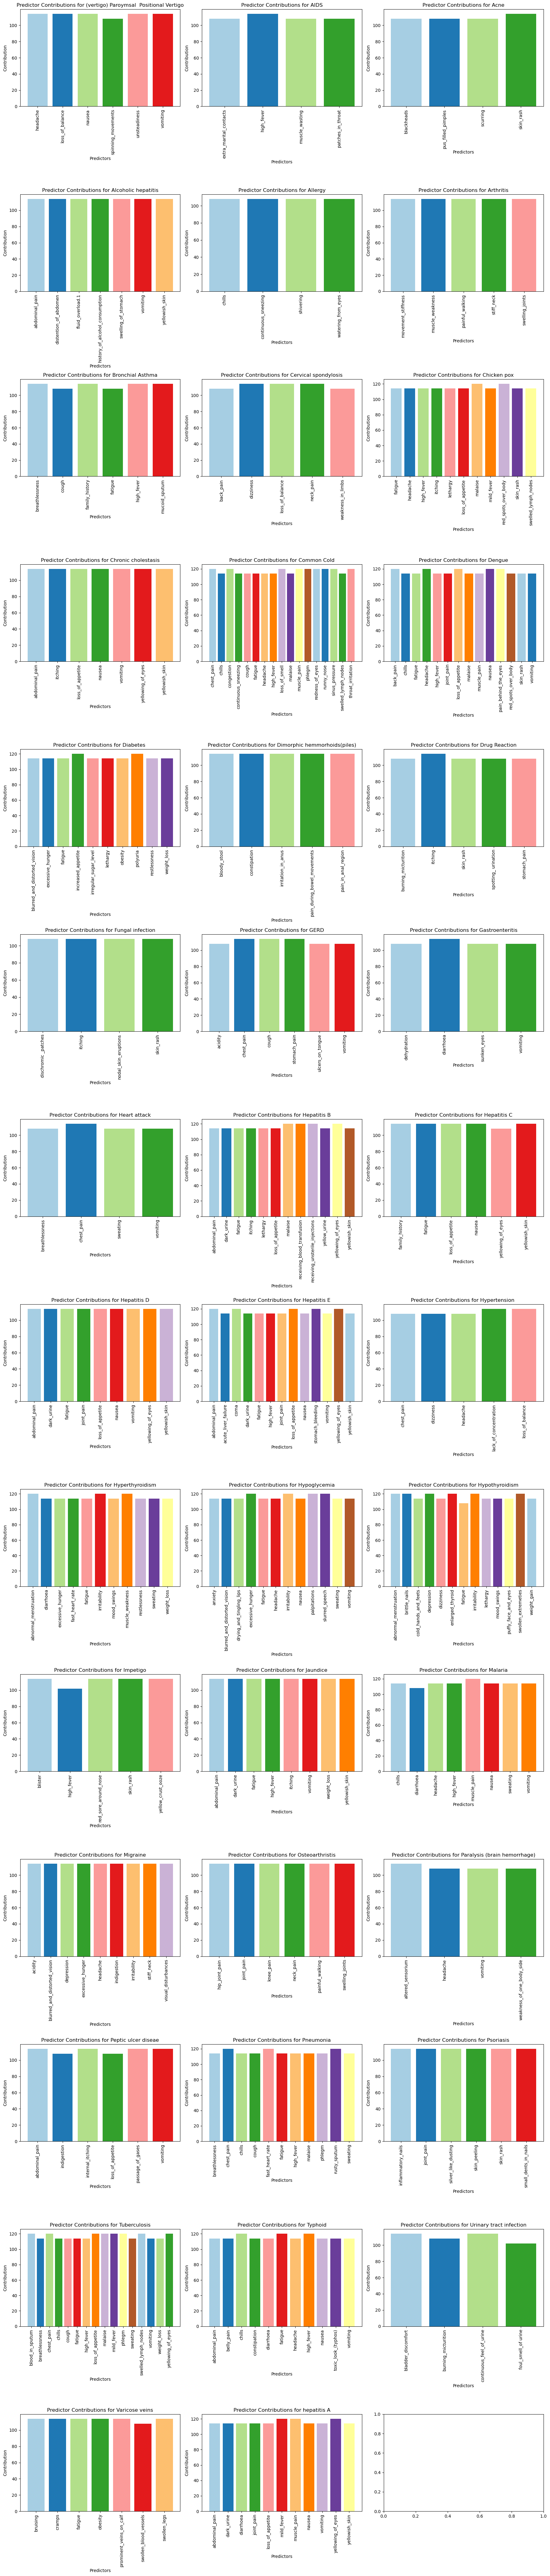

In [20]:
plot_disease_bar_plots()

In [25]:

def plot_disease_pie_charts():
    # Process the data using the process_melted_data function
    melted_train_data = process_melted_data()

    # Get unique diseases from the melted_train_data index
    unique_diseases = melted_train_data.index.get_level_values('prognosis').unique()
    
    # Check if melted_train_data has data
    if melted_train_data.empty:
        print("The melted data is empty. Check if the processing function is correct.")
        return

    # Define the number of subplots based on the number of diseases
    num_diseases = len(unique_diseases)
    print(f"Number of diseases: {num_diseases}")  # Debugging print

    # Create subplots (adjust the grid size as needed)
    fig, axes = plt.subplots(nrows=(num_diseases // 3) + (num_diseases % 3 > 0), 
                             ncols=3, figsize=(18, 6 * ((num_diseases // 3) + (num_diseases % 3 > 0))))

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    # Loop through each unique disease and create a pie chart for each
    for i, selected_disease in enumerate(unique_diseases):
        # Filter data for the selected disease
        disease_data = melted_train_data.loc[selected_disease]
        
        if disease_data.empty:
            print(f"No data found for disease: {selected_disease}")
            continue

        # Prepare data for the pie chart
        labels = disease_data.index.get_level_values('variable')  # Predictor variable names
        sizes = disease_data['value']  # Corresponding values

        print(f"Plotting for disease: {selected_disease}, number of predictors: {len(labels)}")  # Debugging print

        # Create the pie chart in the corresponding subplot
        axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

        # Set the title for each pie chart
        axes[i].set_title(f'Predictor Contributions for {selected_disease}')
        axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


Number of diseases: 41
Plotting for disease: (vertigo) Paroymsal  Positional Vertigo, number of predictors: 6
Plotting for disease: AIDS, number of predictors: 4
Plotting for disease: Acne, number of predictors: 4
Plotting for disease: Alcoholic hepatitis, number of predictors: 7
Plotting for disease: Allergy, number of predictors: 4
Plotting for disease: Arthritis, number of predictors: 5
Plotting for disease: Bronchial Asthma, number of predictors: 6
Plotting for disease: Cervical spondylosis, number of predictors: 5
Plotting for disease: Chicken pox, number of predictors: 11
Plotting for disease: Chronic cholestasis, number of predictors: 7
Plotting for disease: Common Cold, number of predictors: 17
Plotting for disease: Dengue, number of predictors: 14
Plotting for disease: Diabetes , number of predictors: 10
Plotting for disease: Dimorphic hemmorhoids(piles), number of predictors: 5
Plotting for disease: Drug Reaction, number of predictors: 5
Plotting for disease: Fungal infection

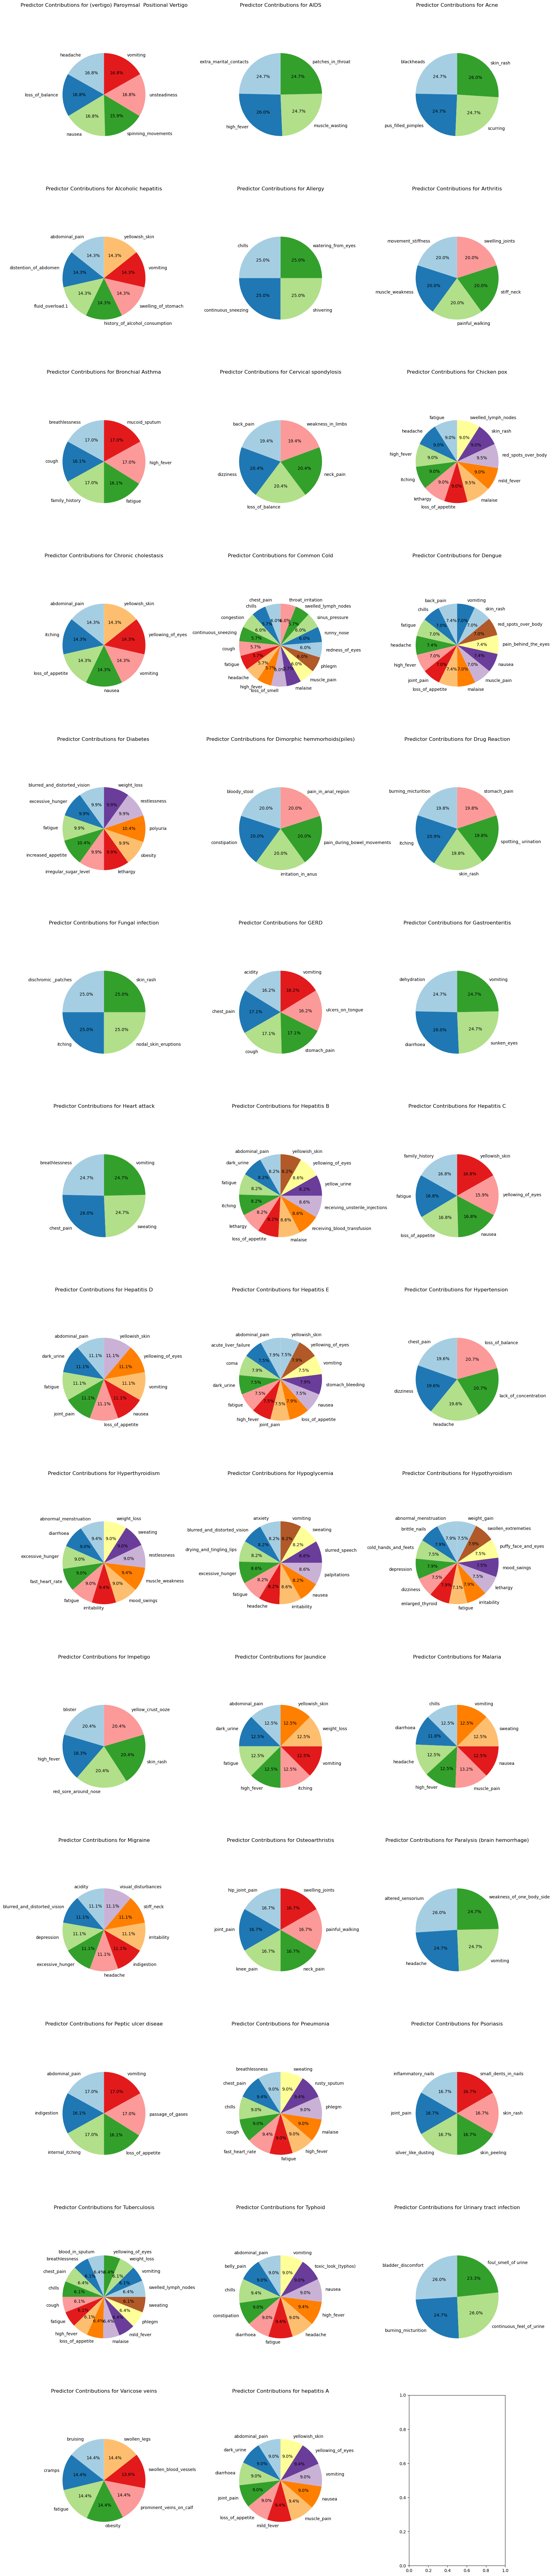

In [26]:
plot_disease_pie_charts()